In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats("svg")

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体为微软雅黑
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [3]:
dataDir = "./asap/data"
figsDir = "./figs"


def get_data_path(dataFile):
    return os.path.join(dataDir, dataFile)


def get_data(dataFile):
    return pd.read_csv(get_data_path(dataFile))

In [4]:
train_set = get_data("train.csv")
test_set = get_data("test.csv")

# concat train and test set
data = pd.concat([train_set, test_set], ignore_index=True)

print(len(train_set), len(test_set))
print(len(data), data.columns)

aspects = [
    "位置#交通便利",
    "位置#位于商圈附近",
    "位置#是否容易寻找",
    "服务#排队时间",
    "服务#服务人员态度",
    "服务#停车方便",
    "服务#点菜/上菜速度",
    "价格#价格水平",
    "价格#性价比",
    "价格#折扣力度",
    "环境#装修情况",
    "环境#嘈杂情况",
    "环境#就餐空间",
    "环境#卫生情况",
    "菜品#分量",
    "菜品#口味",
    "菜品#外观",
    "菜品#推荐程度",
]

aspects_en = [
    "Location#Transportation",
    "Location#Downtown",
    "Location#Easy_to_find",
    "Service#Queue",
    "Service#Hospitality",
    "Service#Parking",
    "Service#Timely",
    "Price#Level",
    "Price#Cost_effective",
    "Price#Discount",
    "Ambience#Decoration",
    "Ambience#Noise",
    "Ambience#Space",
    "Ambience#Sanitary",
    "Food#Portion",
    "Food#Taste",
    "Food#Appearance",
    "Food#Recommend",
]

assert len(aspects) == len(aspects_en)
assert len(data) == len(train_set) + len(test_set)

36850 4940
41790 Index(['id', 'review', 'star', 'Location#Transportation', 'Location#Downtown',
       'Location#Easy_to_find', 'Service#Queue', 'Service#Hospitality',
       'Service#Parking', 'Service#Timely', 'Price#Level',
       'Price#Cost_effective', 'Price#Discount', 'Ambience#Decoration',
       'Ambience#Noise', 'Ambience#Space', 'Ambience#Sanitary', 'Food#Portion',
       'Food#Taste', 'Food#Appearance', 'Food#Recommend'],
      dtype='object')


In [5]:
for column in data[aspects_en]:
    print(data[column].value_counts())

Location#Transportation
-2    33463
 1     7468
-1      509
 0      350
Name: count, dtype: int64
Location#Downtown
-2    34590
 1     6825
-1      205
 0      170
Name: count, dtype: int64
Location#Easy_to_find
-2    33731
 1     5879
-1     1400
 0      780
Name: count, dtype: int64
Service#Queue
-2    35518
 0     2380
 1     2097
-1     1795
Name: count, dtype: int64
Service#Hospitality
-2    17833
 1    15255
 0     4941
-1     3761
Name: count, dtype: int64
Service#Parking
-2    38988
 1     1642
-1      588
 0      572
Name: count, dtype: int64
Service#Timely
-2    35354
 1     3224
-1     2255
 0      957
Name: count, dtype: int64
Price#Level
-2    21133
 0     9378
 1     6063
-1     5216
Name: count, dtype: int64
Price#Cost_effective
-2    32514
 1     7054
-1     1133
 0     1089
Name: count, dtype: int64
Price#Discount
-2    28354
 0     6623
 1     6101
-1      712
Name: count, dtype: int64
Ambience#Decoration
-2    23247
 1    14151
 0     3539
-1      853
Name: count, dt

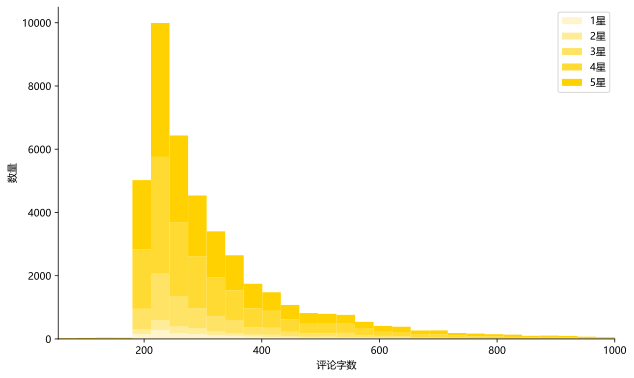

In [6]:
# Assuming 'data' contains a 'star' column with star ratings and a 'review' column with text
data["length"] = data["review"].apply(lambda x: len(x))

# Prepare the data: creating a list of lengths for each star rating
lengths = [data[data["star"] == star]["length"] for star in range(1, 6)]


def get_rgb(color_name):
    import matplotlib.colors as mcolors

    rgb = [255, 209, 0]
    return [num / 255 for num in rgb]
    """Return the RGB values of the given color name as a tuple."""
    try:
        # Get the RGB values from matplotlib, which are normalized between 0 and 1
        rgb = mcolors.to_rgb(color_name)
        # Convert to standard RGB values (0 to 255)
        return tuple(int(value) for value in rgb)
    except ValueError:
        return None  # Return None if color name is not found


# retrive rgb of "gold" color
colors = [(*get_rgb(""), i / 5.0) for i in range(1, 6)]  # Increasing transparency

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=30, stacked=True, color=colors)
plt.xlabel("评论字数")
plt.ylabel("数量")
plt.legend(["1星", "2星", "3星", "4星", "5星"])
plt.xlim(min(data["length"]), max(data["length"]))

# drop the border
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Save the figure
plt.savefig(os.path.join(figsDir, "length_distribution_stacked_transparency.svg"))
plt.show()

In [7]:
# Filter out -2 values and count other categories
sentiment_counts = {}
for aspect in aspects_en:
    filtered_data = data[aspect][data[aspect] != -2]
    counts = filtered_data.value_counts()
    sentiment_counts[aspect] = counts

# rename the index of the counts


# Create a DataFrame from the counts
sentiment_df = pd.DataFrame(sentiment_counts).fillna(0).transpose()

sentiment_df.index = aspects

# Calculate total counts for each category, excluding '-2' values
sentiment_df["Total_Count"] = sentiment_df.sum(axis=1)

# Sort the DataFrame by 'Total_Count'
sentiment_df = sentiment_df.sort_values(by="Total_Count", ascending=False)

# Define colors for each sentiment
colors = {-1: "red", 0: "grey", 1: get_rgb("")}

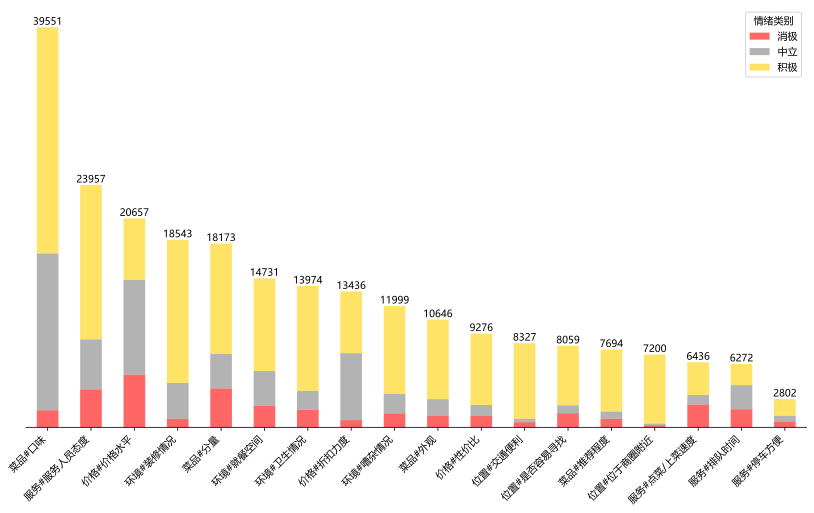

In [8]:
# Plotting stacked bars
ax = sentiment_df.drop(columns=["Total_Count"]).plot(
    kind="bar",
    stacked=True,
    color=[colors[i] for i in sorted(colors.keys())],
    figsize=(14, 8),
    alpha=0.6,
)
plt.xticks(rotation=45, ha="right")
plt.legend(["消极", "中立", "积极"], title="情绪类别")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

# drop y ticks
plt.gca().axes.get_yaxis().set_visible(False)

# Add total count on each bar
for i, total in enumerate(sentiment_df["Total_Count"]):
    ax.text(
        i,
        total,
        "{:.0f}".format(total),
        ha="center",
        va="bottom",
    )

# Adjust the layout
plt.subplots_adjust(bottom=0.15)

plt.savefig(os.path.join(figsDir, "sentiment_distribution_stacked.svg"))

# Show the plot
plt.show()

In [9]:
data[aspects_en]

,Location#Transportation,Location#Downtown,Location#Easy_to_find,Service#Queue,Service#Hospitality,Service#Parking,Service#Timely,Price#Level,Price#Cost_effective,Price#Discount,Ambience#Decoration,Ambience#Noise,Ambience#Space,Ambience#Sanitary,Food#Portion,Food#Taste,Food#Appearance,Food#Recommend
0,1,1,1,-2,1,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,1,-2,-2
1,1,-2,-2,-2,1,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,1,-2,-2
2,-2,-2,-2,-2,1,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,0,1,-2
3,-2,-2,-2,-1,1,-2,-2,0,-2,1,-2,-2,-2,-2,1,1,-2,-2
4,-2,1,-1,-2,-2,-2,-2,1,-2,1,-2,-2,-2,-2,1,1,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41785,1,-2,-2,-2,1,-2,-2,1,-2,-2,-2,-2,-2,-2,1,1,-2,-2
41786,1,-2,-2,-2,1,-2,1,-2,-2,1,0,0,0,0,-2,1,1,1
41787,-2,-2,-2,-2,1,-2,-2,-1,-2,-2,1,-2,0,-2,1,0,-2,0
41788,1,-2,-2,-2,-2,1,-2,-1,-2,-2,-2,-2,-2,-2,-2,0,1,-1


In [10]:
sentiment_df

,-1,0,1,Total_Count
菜品#口味,1691,15506,22354,39551
服务#服务人员态度,3761,4941,15255,23957
价格#价格水平,5216,9378,6063,20657
环境#装修情况,853,3539,14151,18543
菜品#分量,3851,3408,10914,18173
环境#就餐空间,2117,3448,9166,14731
环境#卫生情况,1744,1863,10367,13974
价格#折扣力度,712,6623,6101,13436
环境#嘈杂情况,1384,1916,8699,11999
菜品#外观,1174,1616,7856,10646
